In [1]:
# Import modules
import numpy as np # maths

from time import time# timer for debug

    # gather results obtained from the runs
import pickle # open .pkl files where python objects have been saved
from safe import safe # the empty class which is used to save the results
    
    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [2]:
# Create a folder to save the pictures
foldername = '../Analysis_CSCS/Systematic_J2J3_16-10-19/'
results_foldername = 'Results_18-10-19/'
os.makedirs('./' + foldername + 'Plots' + results_foldername, exist_ok = True)
#filenamelist = ['J2J3_nsm128000_L12_cpu12_lam0_J21_J30',
#                'J2J3_nsm128000_L12_cpu12_lam0.05_J20.95_J30.05',
#                'J2J3_nsm128000_L12_cpu12_lam0.1_J20.9_J30.1',
#                'J2J3_nsm128000_L12_cpu12_lam0.15_J20.85_J30.15',
#                'J2J3_nsm128000_L12_cpu12_lam0.2_J20.8_J30.2',
#                'J2J3_nsm128000_L12_cpu12_lam0.25_J20.75_J30.25',
#                'J2J3_nsm128000_L12_cpu12_lam0.3_J20.7_J30.3',
#                'J2J3_nsm128000_L12_cpu12_lam0.3333333333333333_J20.6666666666666667_J30.3333333333333333']
#filenamelist = ['J2J3_nsm128000_L12_cpu12_lam0.3333333333333333_J20.6666666666666667_J30.3333333333333333',
#                'J2J3_nsm128000_L12_cpu12_lam0.35_J20.65_J30.35',
#                'J2J3_nsm128000_L12_cpu12_lam0.4_J20.6_J30.4',
#                'J2J3_nsm128000_L12_cpu12_lam0.5_J20.5_J30.5']
filenamelist = ['J2J3_nsm128000_L12_cpu12_lam0.5_J20.5_J30.5'#,
                #'J2J3_nsm128000_L12_cpu12_lam0.55_J20.44999999999999996_J30.55',
                #'J2J3_nsm128000_L12_cpu12_lam0.6_J20.4_J30.6',
                #'J2J3_nsm128000_L12_cpu12_lam0.7_J20.30000000000000004_J30.7',
                #'J2J3_nsm128000_L12_cpu12_lam0.8_J20.19999999999999996_J30.8',
                #'J2J3_nsm128000_L12_cpu12_lam0.9_J20.09999999999999998_J30.9',
                #'J2J3_nsm128000_L12_cpu12_lam1_J20_J31'
               ]

n = len(filenamelist)

In [3]:
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, temperatures, nt, stat_temps, 
 temperatures_plots, listfunctions, sref] = af.LoadParameters(foldername, filenamelist)

swapsth, swaps = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin)

[t_MeanE, t_MeanEsq, t_varMeanE, t_varMeanEsq, C, ErrC] = \
 af.LoadEnergy(foldername, filenamelist, numsites, nb, stat_temps, temperatures, listfunctions)

t_MeanM, t_MeanMsq, t_varMeanM, t_varMeanMsq, Chi, ErrChi = \
 af.LoadMagnetisation(foldername, filenamelist, numsites, nb, stat_temps, temperatures, listfunctions)

t_MeanSs, t_varMeanSs, t_MeanSi, t_varMeanSi, t_MeanCorr, t_errCorrEstim = \
 af.LoadCentralCorrelations(foldername, filenamelist, listfunctions, sref, stat_temps, nb)


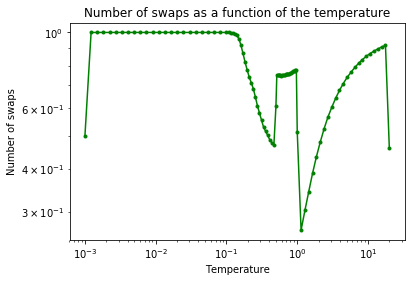

In [4]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
tidmin = 0
tidmax = nt
af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, foldername, results_foldername, swaps)

Verifying that the low temperatures of file  J2J3_nsm128000_L12_cpu12_lam0.5_J20.5_J30.5 correspond to the ground state.


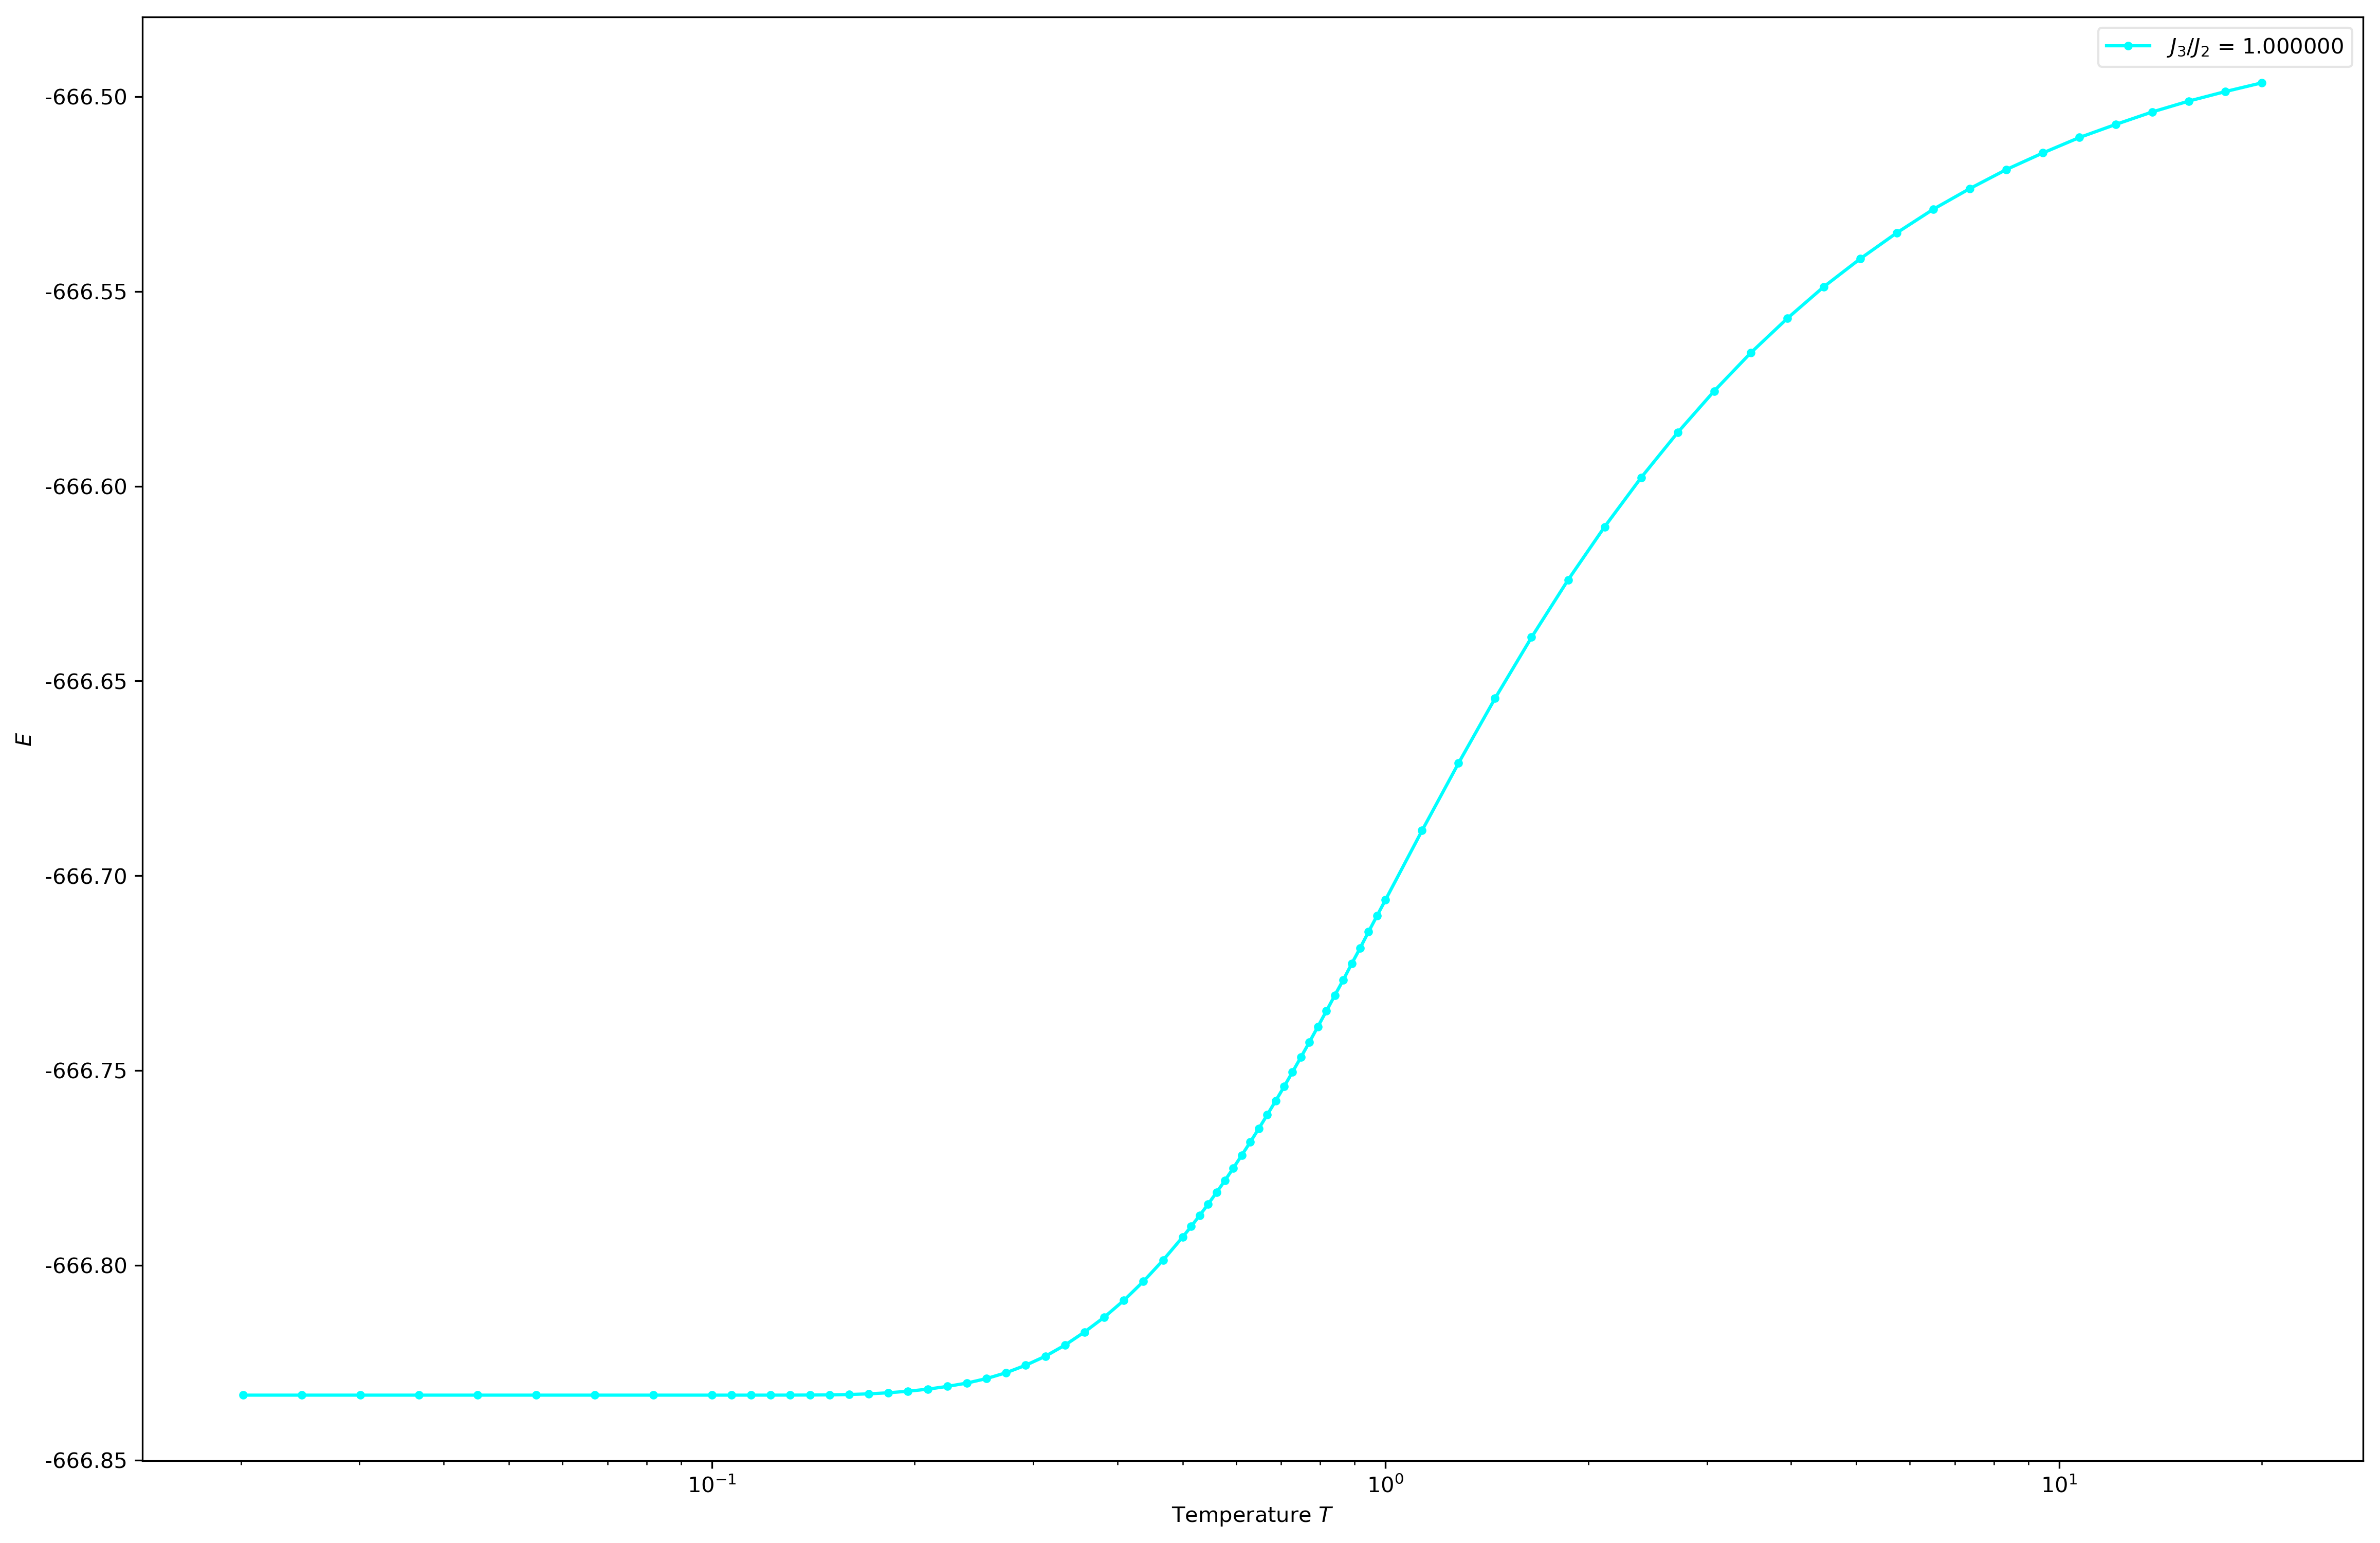

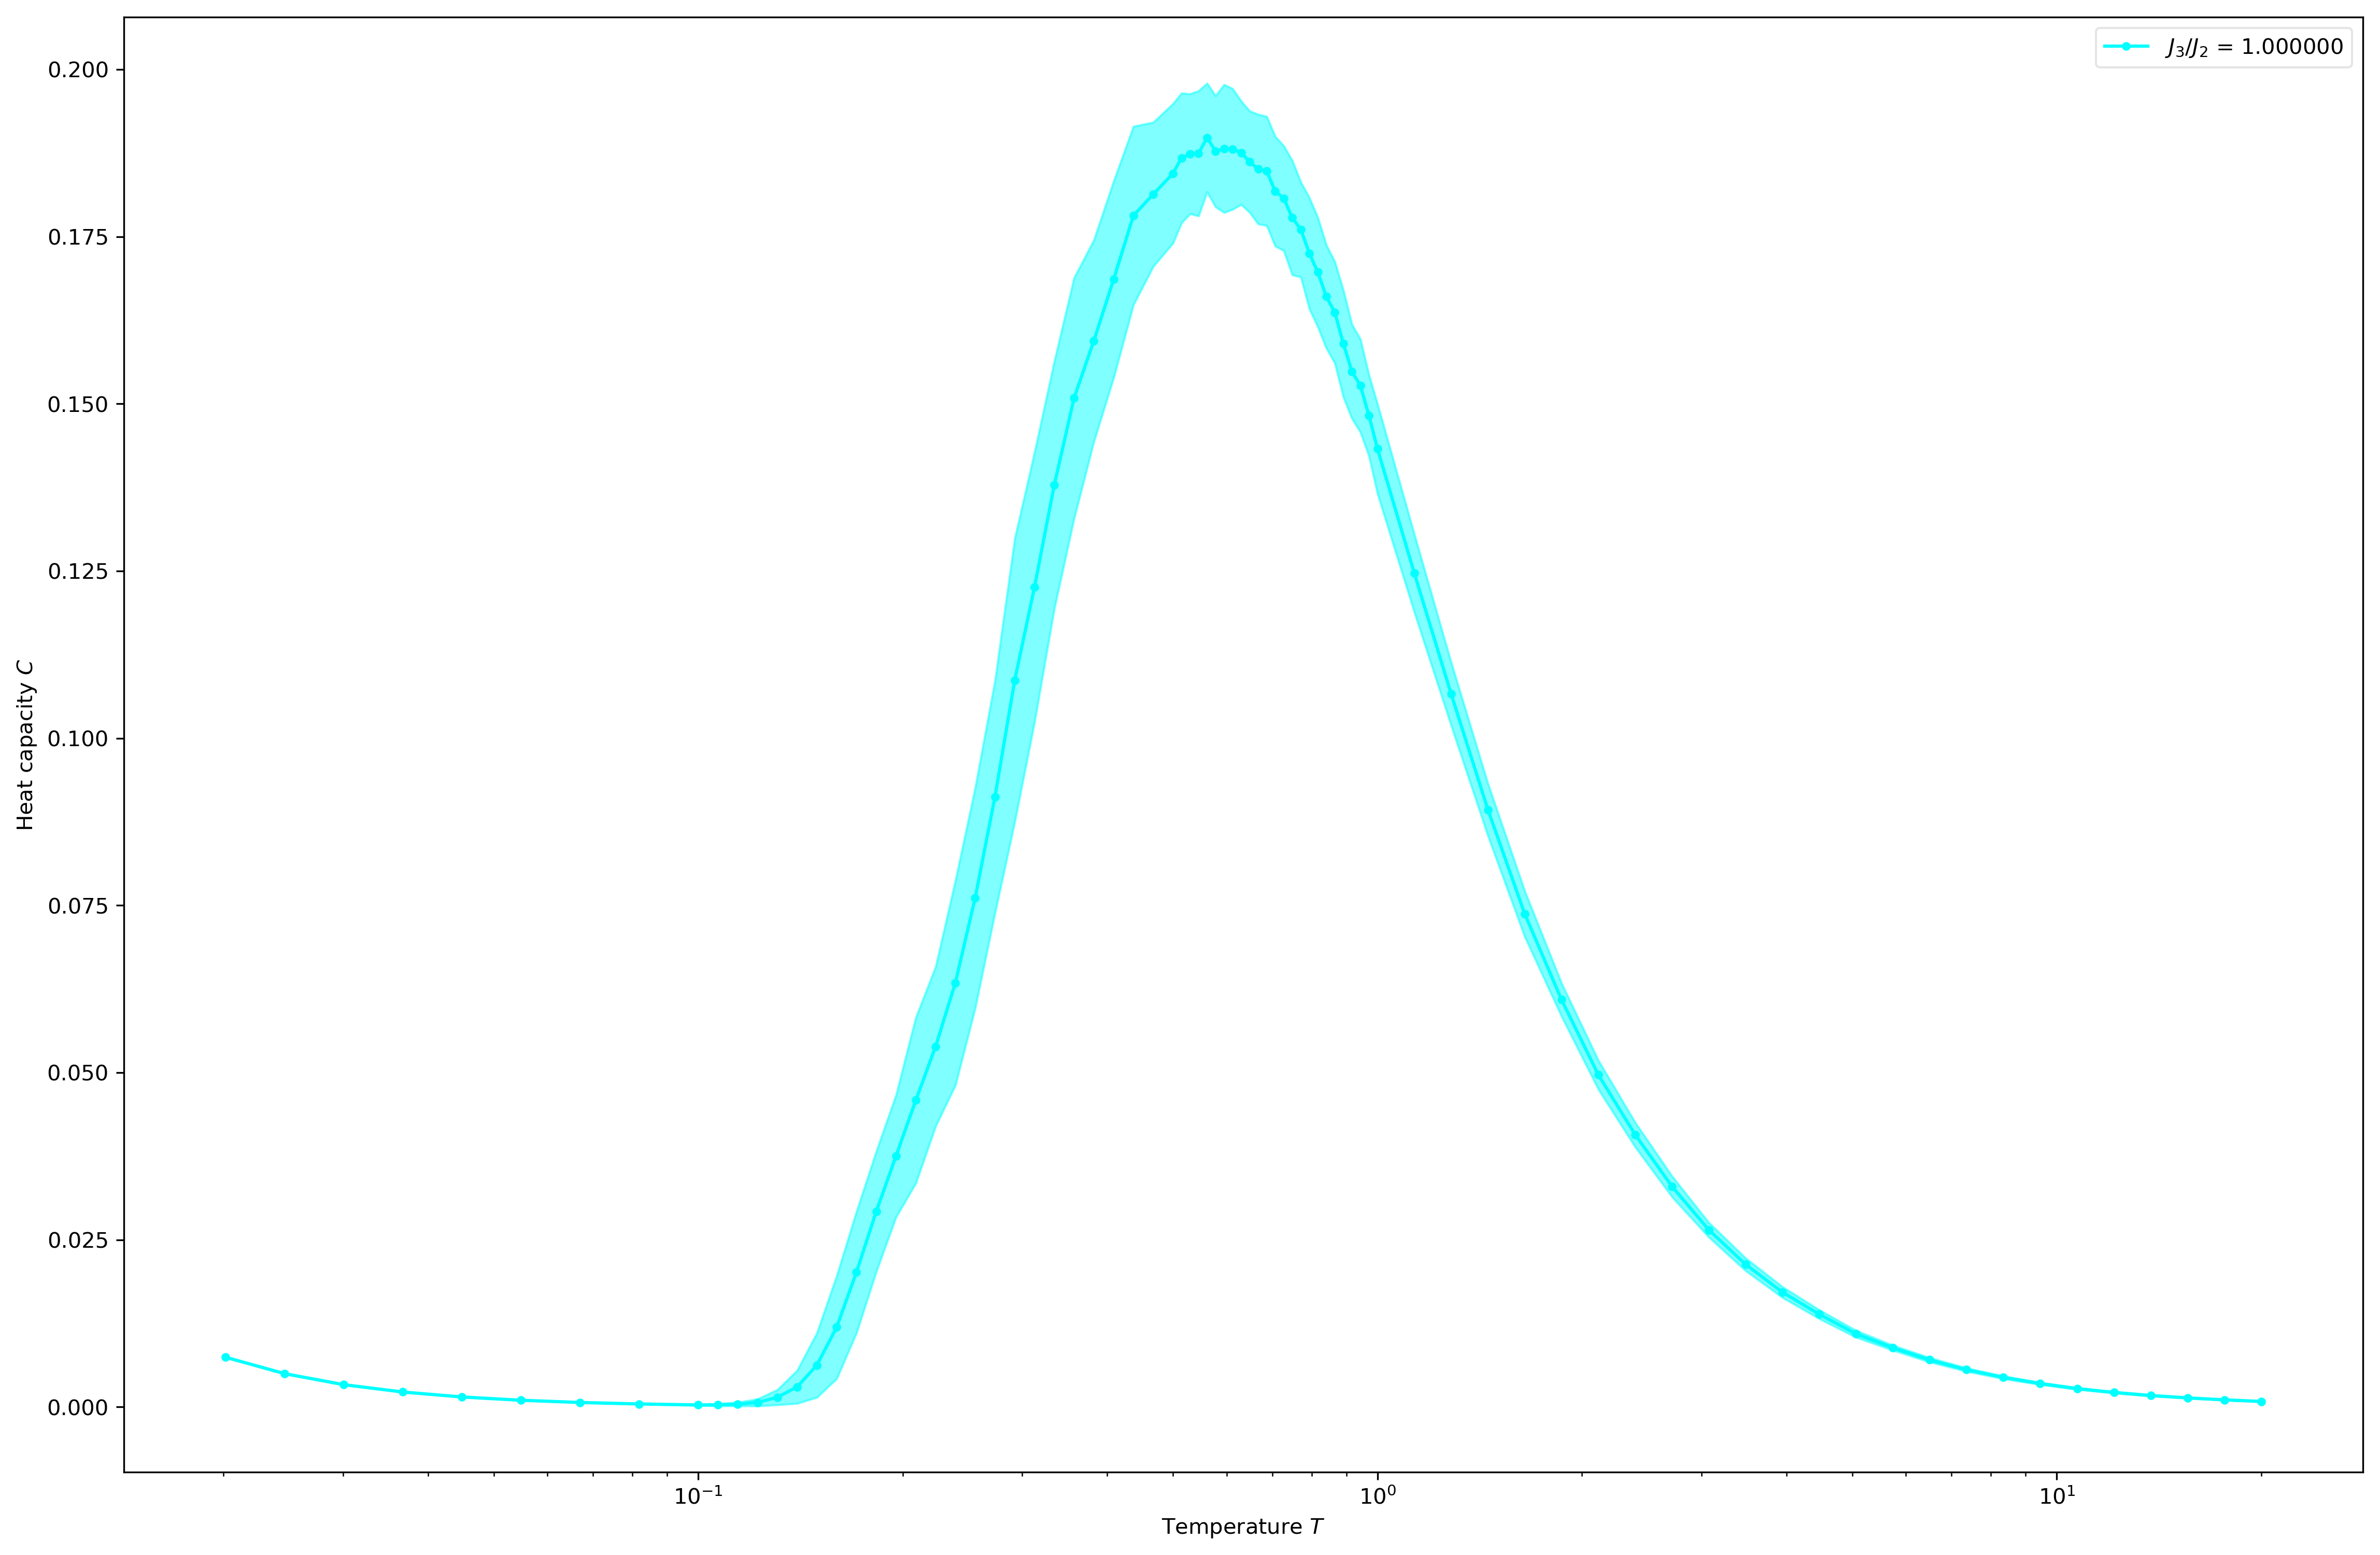

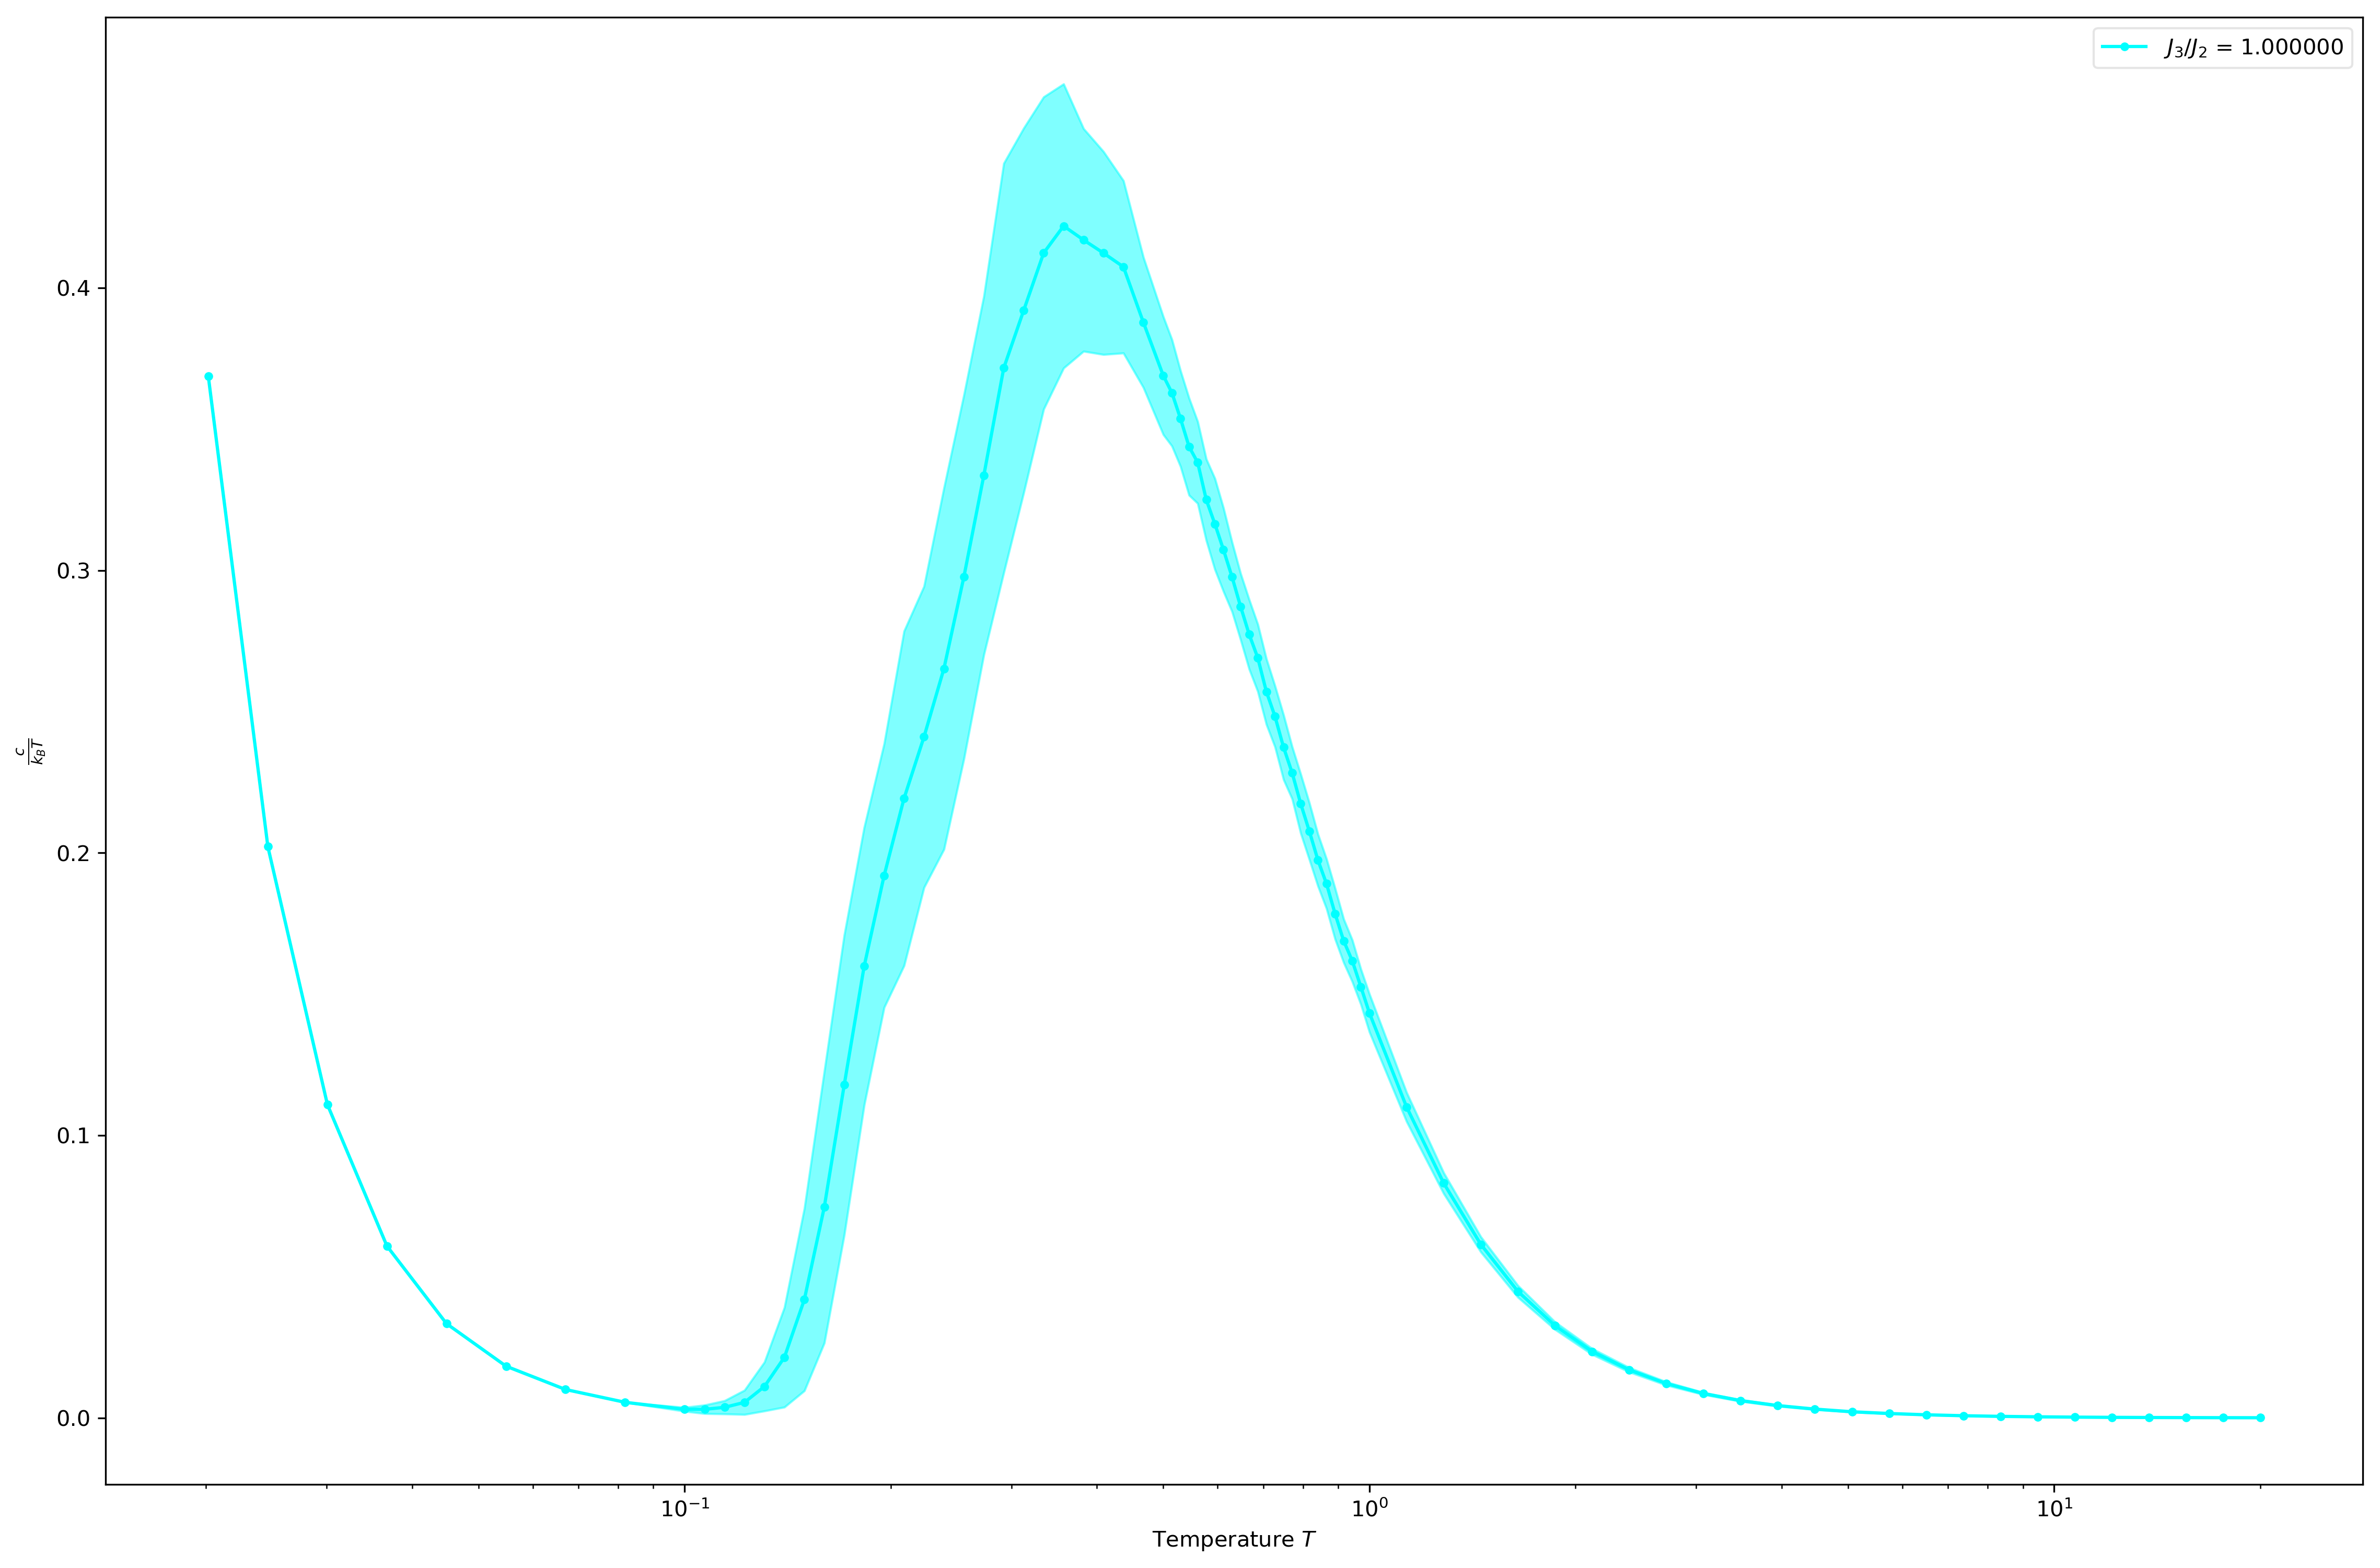

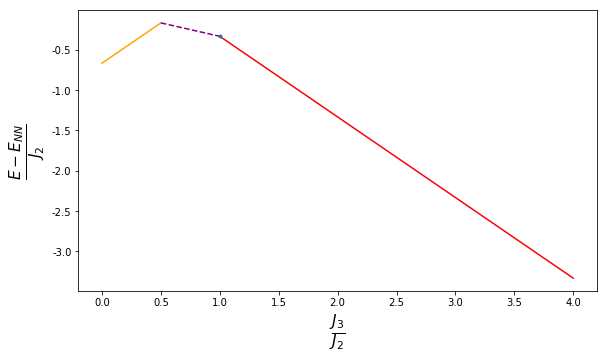

In [5]:
###########################################
        ## STATISTICS ANALYSIS ##
###########################################
tidmin = 15
tidmax = [len(stat_temps[i]) for i in range(n)]
temperatures_plots = np.array(temperatures_plots)
### Energy
af.BasicPlotsE(L, n, tidmin, tidmax, temperatures_plots, foldername, results_foldername, filenamelist, t_MeanE, t_MeanEsq, t_varMeanE, t_varMeanEsq, C, ErrC, J1, J2, J3, J4)
### Magnetisation
#af.BasicPlotsM(L, n, tidmin, tidmax, temperatures_plots, foldername, results_foldername, filenamelist, t_MeanM, t_MeanMsq, t_varMeanM, t_varMeanMsq, Chi, ErrChi, J1, J2, J3, J4)

In [6]:
distances =[]
distances_spins = []
NNList = []
for i in range(n):
    distancesi, distances_spinsi, NNListi, s_pos, srefs = kf.KagomeNearestNeighboursLists(L[i], 4)
    distances.append(distancesi)
    distances_spins.append(distances_spinsi)
    NNList.append(NNListi)

In [7]:
### COMPUTING CORRELATIONS FROM <SISJ> AND <SI> 
t = 1
corr = [[] for i in range(n)]
errcorr = [[] for i in range(n)]
errf = [[] for i in range(n)]
maxerr = [0 for i in range(n)]
for i in range(n):
    corr[i] = np.array(t_MeanCorr[i])[:,t]
    errcorr[i] = np.sqrt(np.array(t_errCorrEstim[i])[:,t])
    errf[i] = np.sqrt(np.array(t_varMeanSs[i])[:,t])
    maxerr[i] = np.amax(np.abs(np.array(t_MeanSi[i])[:,t]))**2
    
print(np.sqrt(maxerr))

[0.008375]


/usr/lib64/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


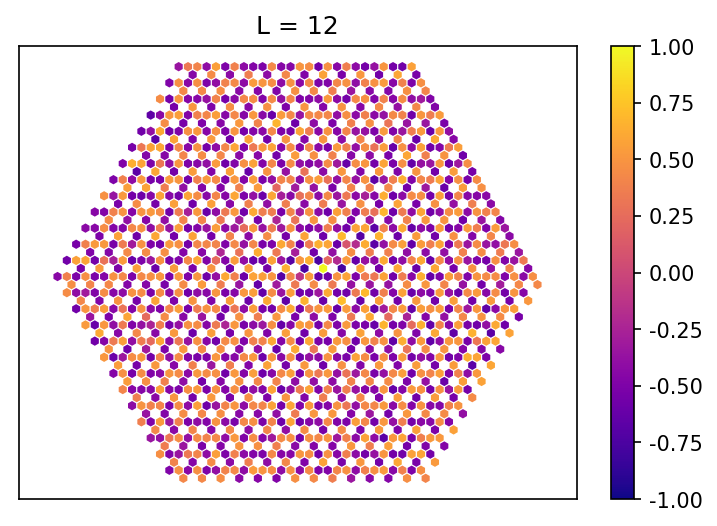

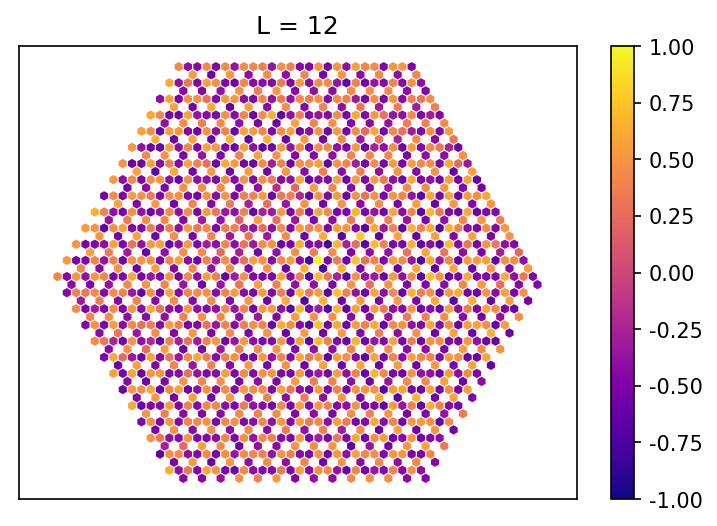

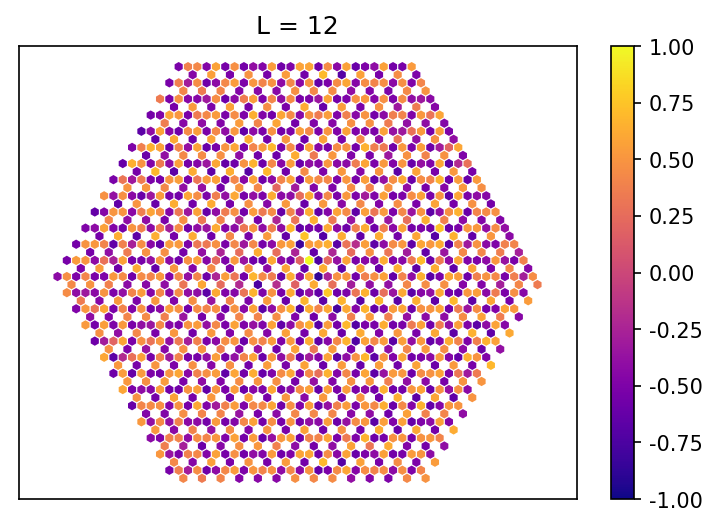

In [8]:
### PLOTTING CORRELATIONS IN 2D
for i in range(n):
    a =1
    
    plt.figure(dpi=150)
    kdraw.plot_function_kag(corr[i][0], L[i], a)
    plt.title('L = {0}'.format(L[i]))
    plt.clim(-1,1)
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/Correlations0_L{0}_various-nsms.png'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/Correlations0_L{0}.pgf'.format(L[i]))
    plt.show()
    
    
    plt.figure(dpi=150)
    kdraw.plot_function_kag(corr[i][1], L[i], a)
    plt.title('L = {0}'.format(L[i]))
    plt.clim(-1,1)
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/Correlations1_L{0}_various-nsms.png'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/Correlations1_L{0}.pgf'.format(L[i]))
    plt.show()
    
    plt.figure(dpi=150)
    kdraw.plot_function_kag(corr[i][2], L[i], a)
    plt.title('L = {0}'.format(L[i]))
    plt.clim(-1,1)
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/Correlations2_L{0}_various-nsms.png'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/Correlations2_L{0}.pgf'.format(L[i]))
    plt.show()

/usr/lib64/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


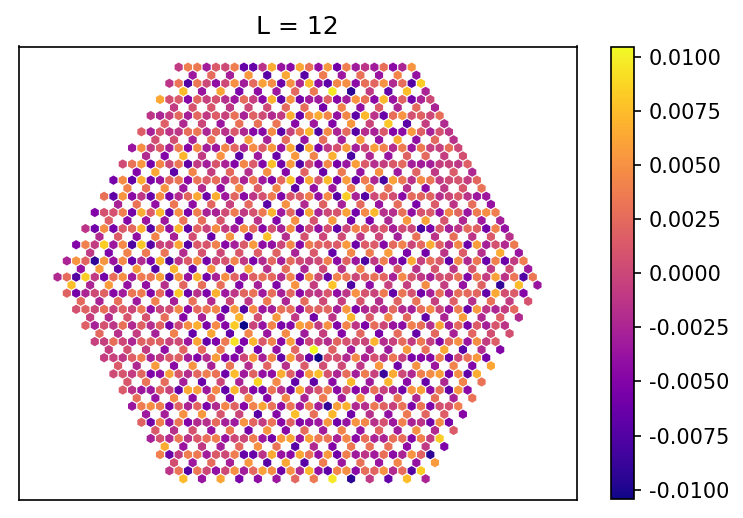

0.00940624999999995


In [9]:
### PLOTTING SPIN AVERAGE IN 2D

avgsi =  [[] for i in range(n)]
for i in range(n):
    avgsi[i] = np.array(t_MeanSi[i])[t,:]

for i in range(n):
    a = 1
    
    plt.figure(dpi=150)
    kdraw.plot_function_kag(avgsi[i], L[i], a)
    plt.title('L = {0}'.format(L[i]))
    #plt.clim(-1,1)
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/Spinaverage_L{0}_various-nsms.png'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/Spinaverage_L{0}.pgf'.format(L[i]))
    plt.show()
    
    print(sum(avgsi[i]))
    

/usr/lib64/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


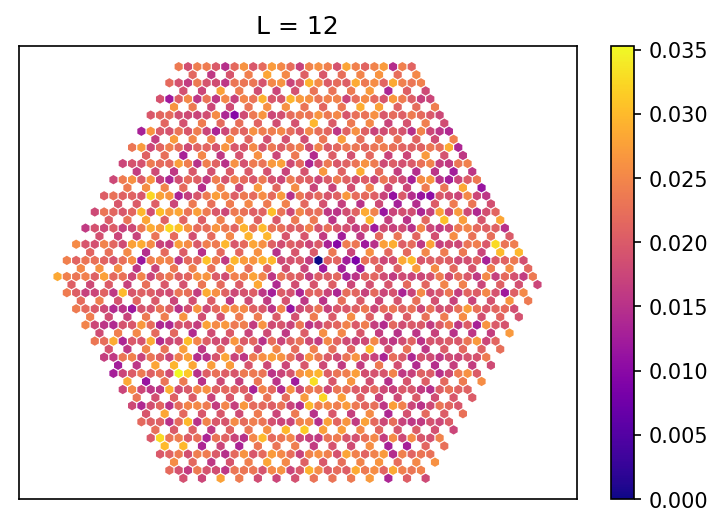

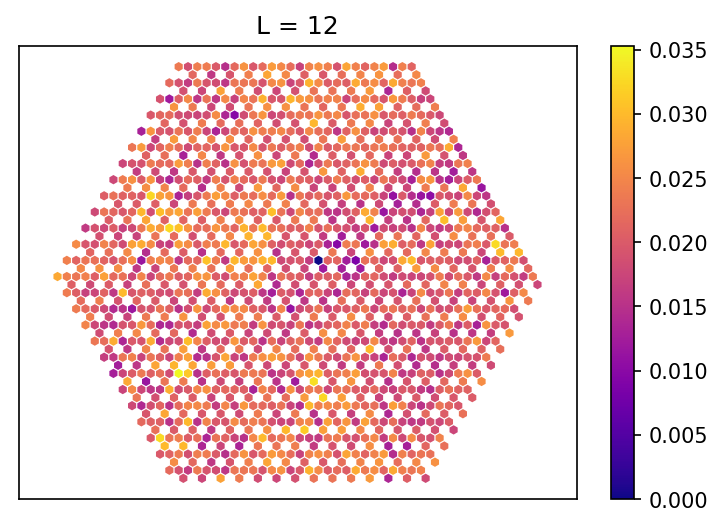

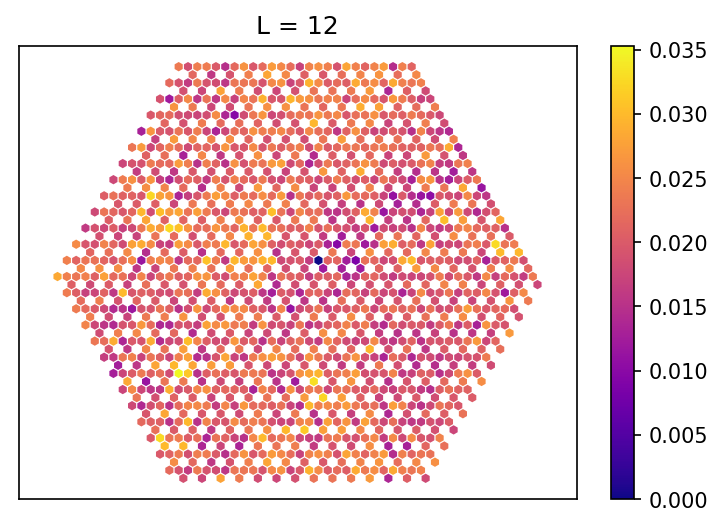

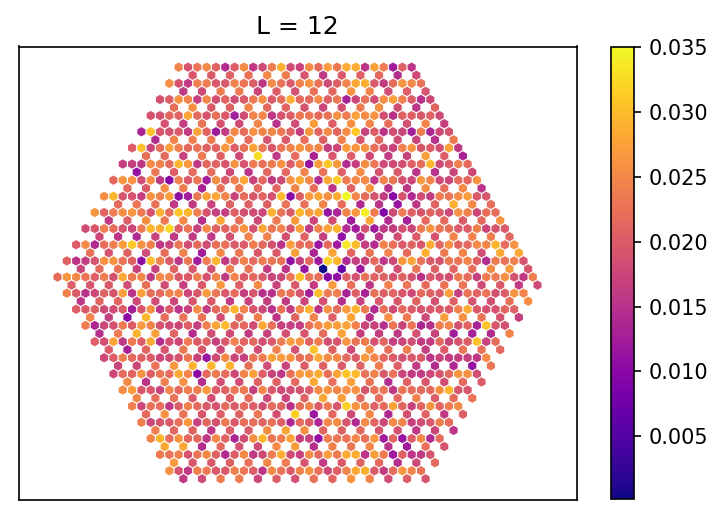

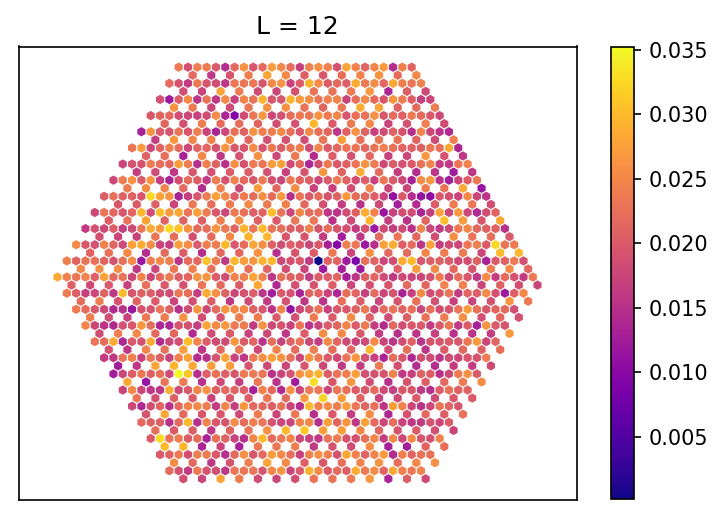

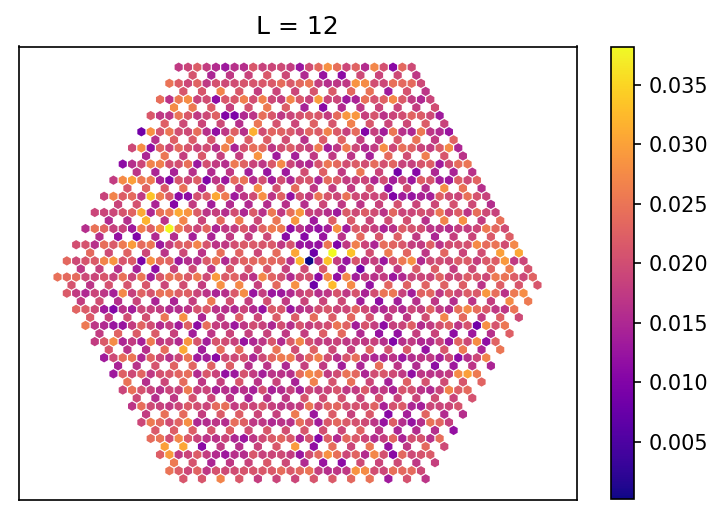

In [10]:
### PLOTTING ERRORS ON CORRELATIONS IN 2D
for i in range(n):
    a = 1
    
    plt.figure(dpi=150)
    kdraw.plot_function_kag(errf[i][0], L[i], a)
    plt.title('L = {0}'.format(L[i]))
    #plt.clim(-1,1)
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/CorrelationsErr0_L{0}_various-nsms.png'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/CorrelationsErr0_L{0}.pgf'.format(L[i]))
    plt.show()
    
    
    plt.figure(dpi=150)
    kdraw.plot_function_kag(errf[i][1], L[i], a)
    plt.title('L = {0}'.format(L[i]))
    #plt.clim(-1,1)
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/CorrelationsErr1_L{0}_various-nsms.png'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/CorrelationsErr1_L{0}.pgf'.format(L[i]))
    plt.show()
    
    plt.figure(dpi=150)
    kdraw.plot_function_kag(errf[i][2], L[i], a)
    plt.title('L = {0}'.format(L[i]))
    #plt.clim(-1,1)
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/CorrelationsErr2_L{0}_various-nsms.png'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/CorrelationsErr2_L{0}.pgf'.format(L[i]))
    plt.show()
    
    plt.figure(dpi=150)
    kdraw.plot_function_kag(errcorr[i][0], L[i], a)
    plt.title('L = {0}'.format(L[i]))
    #plt.clim(-1,1)
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/CorrelationsErr0_L{0}_various-nsms.png'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/CorrelationsErr0_L{0}.pgf'.format(L[i]))
    plt.show()
    
    
    plt.figure(dpi=150)
    kdraw.plot_function_kag(errcorr[i][1], L[i], a)
    plt.title('L = {0}'.format(L[i]))
    #plt.clim(-1,1)
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/CorrelationsErr1_L{0}_various-nsms.png'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/CorrelationsErr1_L{0}.pgf'.format(L[i]))
    plt.show()
    
    plt.figure(dpi=150)
    kdraw.plot_function_kag(errcorr[i][2], L[i], a)
    plt.title('L = {0}'.format(L[i]))
    #plt.clim(-1,1)
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/CorrelationsErr2_L{0}_various-nsms.png'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/CorrelationsErr2_L{0}.pgf'.format(L[i]))
    plt.show()

In [11]:
def dist_corr(L, findex, corr, errf,distmax):
    distances, distances_spins, NNList, s_pos, srefs = kf.KagomeNearestNeighboursLists(L, distmax)
    
    C = [[0 for i in range(len(NNList[0]))] for j in range(len(srefs))]
    ErrC = [[0 for i in range(len(NNList[0]))] for j in range(len(srefs))]
    for j in range(len(srefs)):
        for i in range(len(NNList[0])):
            Corrji = 0
            ErrCorrji = 0
            count = 0
            for pair in NNList[j][i]:
                if srefs[j] == pair[0]:
                    count += 1
                    Corrji += corr[findex][j][pair[1]]
                    ErrCorrji += errf[findex][j][pair[1]]
            Corrji = Corrji/count
            ErrCorrji = ErrCorrji/count

            
            C[j][i] = Corrji
            ErrC[j][i]= ErrCorrji
        C[j] = np.array(C[j])
        ErrC[j] = np.array(ErrC[j])

    C = np.array(sum(C))/3
    ErrC = np.array(sum(ErrC))/3
    return distances, C, ErrC
        

In [12]:
def dist_lincorr(L,findex, corr, errf,distmax):
    distances, distances_spins, NNList, s_pos, srefs = kf.KagomeNearestNeighboursLists(L, distmax)
    rdistances = []
    C = [[0 for i in range(len(NNList[0]))] for j in range(len(srefs))]
    ErrC = [[0 for i in range(len(NNList[0]))] for j in range(len(srefs))]
    for j in range(len(srefs)):
        ci = 0
        for i in range(len(NNList[0])):
            #if i == 0 or i == 2 or i == 5 or i == 9:
                Corrji = 0
                ErrCorrji = 0
                count = 0
                for pair in NNList[j][i]:
                    if srefs[j] == pair[0]:
                        count += 1
                        Corrji += corr[findex][j][pair[1]]
                        ErrCorrji += errf[findex][j][pair[1]]
                Corrji = Corrji/count
                ErrCorrji = ErrCorrji/count


                C[j][ci] = Corrji
                ErrC[j][ci]= ErrCorrji
                ci = ci+1
                rdistances.append(distances[i])
        C[j] = np.array(C[j])
        ErrC[j] = np.array(ErrC[j])

    C = np.array(sum(C))/3
    ErrC = np.array(sum(ErrC))/3
    return rdistances, C, ErrC

In [13]:
i = 0
distances, distances_spins, NNList, s_pos, srefs = kf.KagomeNearestNeighboursLists(L[i],4)

In [14]:
i=0
resr, rescorr, reserrcorr = dist_lincorr(L[i], i ,corr, errcorr, 12);

In [15]:
rescorr

array([-0.42919025,  0.36427529, -0.03618192, -0.78876908,  0.37711341,
       -0.31330527,  0.04437509, -0.61729488, -0.36953305,  0.6342953 ,
        0.27204793, -0.29107985, -0.2902292 ,  0.37457237, -0.19774093,
        0.30253428, -0.23689068, -0.30686115,  0.27701658,  0.28815859,
        0.55866583, -0.28718952, -0.13676566, -0.29546465, -0.24731525,
        0.30878835,  0.52703952,  0.17655933, -0.2958135 ,  0.32292049,
       -0.22282934,  0.29466396, -0.18170309, -0.14399399,  0.25427428,
       -0.22004413, -0.27730791, -0.23794346,  0.23997392, -0.11441186,
       -0.30133196,  0.2794765 ,  0.51283357, -0.25815469, -0.25774534,
       -0.17105636,  0.23581195, -0.2238986 , -0.26703324,  0.25458598,
        0.54310961])

In [16]:
np.array(t_MeanSi[0]).shape

(96, 1296)

[-0.42919025  0.36427529 -0.03618192 -0.78876908  0.37711341 -0.31330527
  0.04437509 -0.61729488 -0.36953305  0.6342953   0.27204793 -0.29107985
 -0.2902292   0.37457237 -0.19774093  0.30253428 -0.21192269]


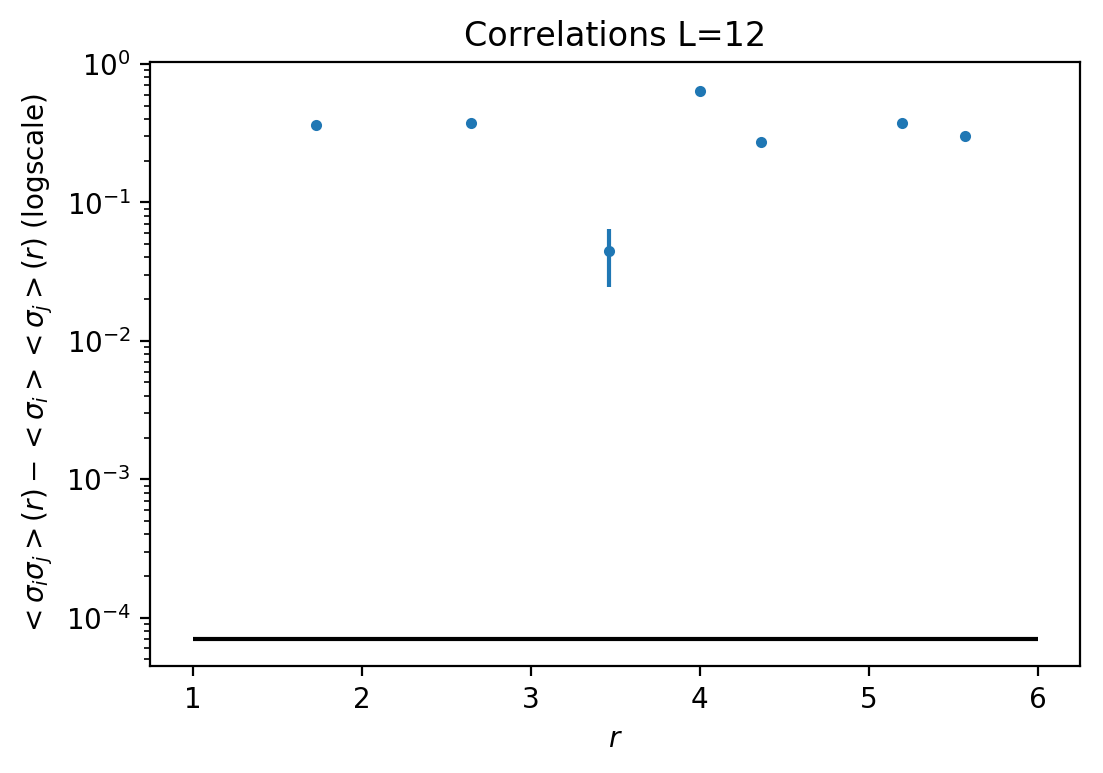

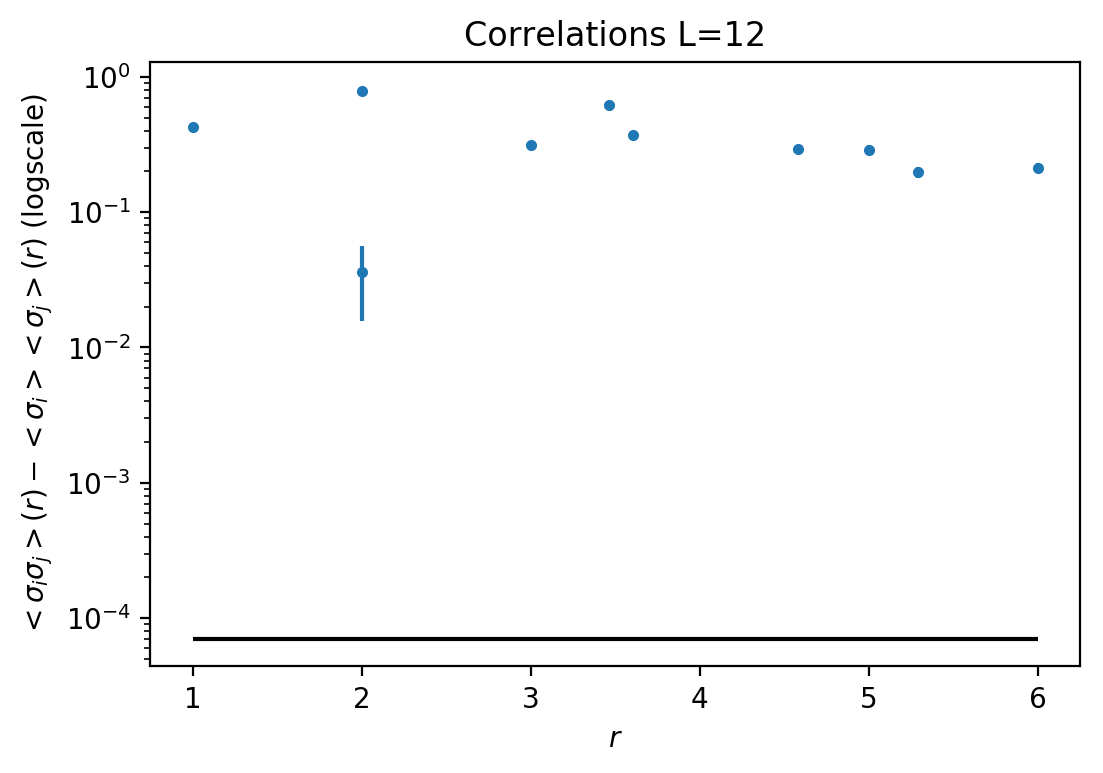

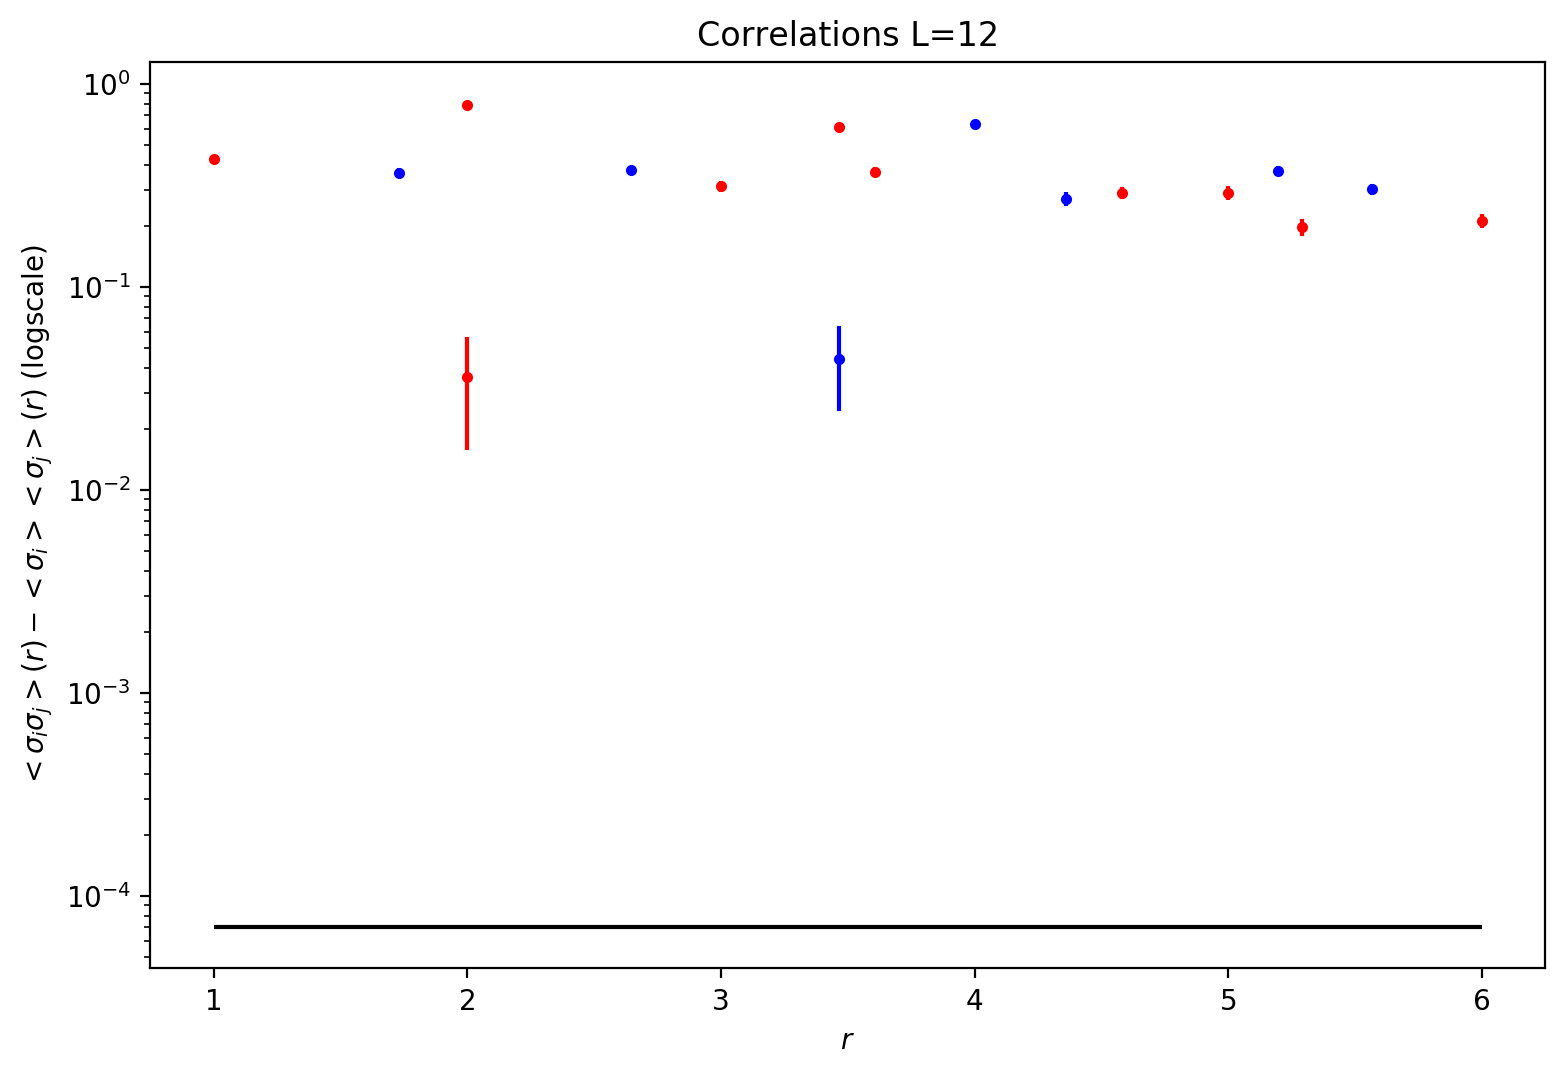

In [17]:
## PLOT RADIAL DEPENDENCE OF THE CORRELATIONS (AND SPOTTING THE FIRST SEVEN SITES)
minr = []
maxr = []

rpos = [[] for _ in range(n)]
corrpos = [[] for _ in range(n)]
errcorrpos = [[] for _ in range(n)]

rneg = [[] for _ in range(n)]
corrneg = [[] for _ in range(n)]
errcorrneg = [[] for _ in range(n)]

rtot = [[] for _ in range(n)]
corrtot = [[] for _ in range(n)]
errcorrtot = [[] for _ in range(n)]

firstfewposlist = []
distmax = 6

resrlist = [[] for _ in range(n)]
for i in range(n):
    distmin = 0.5
    (resr, rescorr, reserrcorr) = dist_lincorr(L[i], i ,corr, errcorr, distmax)
    #firstfewposlist.append(firstfewpos)
    #print(rescorr)
    print(rescorr)
    resrlist[i] = resr
    for index, correl in enumerate(rescorr):
        if correl >= 0:
            rpos[i].append(resr[index])
            rtot[i].append(resr[index])
            corrpos[i].append(correl)
            corrtot[i].append(correl)
            errcorrpos[i].append(reserrcorr[index])
            errcorrtot[i].append(reserrcorr[index])
        else:
            rneg[i].append(resr[index])
            rtot[i].append(resr[index])
            corrneg[i].append(-correl)
            corrtot[i].append(-correl)
            errcorrneg[i].append(reserrcorr[index])
            errcorrtot[i].append(reserrcorr[index])

    rpos[i] = np.array(rpos[i])
    rneg[i] = np.array(rneg[i])
    rtot[i] = np.array(rtot[i])
    minr.append(min(rtot[i]))
    maxr.append(max(rtot[i]))
    corrpos[i] = np.array(corrpos[i])
    corrneg[i] = np.array(corrneg[i])
    corrtot[i] = np.array(corrtot[i])
    errcorrpos[i] = np.array(errcorrpos[i])
    errcorrneg[i] = np.array(errcorrneg[i])
    errcorrtot[i] = np.array(errcorrtot[i])
    
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    fig, ax = plt.subplots(dpi=200) # short for the above
    ax.set_yscale("log", nonposy='clip')
    #plt.semilogy(rpos[i], corrpos[i], '.')
    plt.errorbar(rpos[i], corrpos[i], yerr=errcorrpos[i], fmt = '.')
    plt.hlines([maxerr[i]], minr[i], maxr[i])
    plt.xlabel(r'$r$')
    plt.ylabel(r'$<\sigma_i \sigma_j>(r) - <\sigma_i> <\sigma_j>(r) $ (logscale)')
    plt.title('Correlations L={0}'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/Correlations_Pos_L={0}_various-nsms.png'.format(L[i]))
    
    fig, ax = plt.subplots(dpi=200) # short for the above
    ax.set_yscale("log", nonposy='clip')
    #plt.semilogy(rpos[i], corrpos[i], '.')
    plt.errorbar(rneg[i], corrneg[i], yerr=errcorrneg[i], fmt = '.')
    plt.hlines([maxerr[i]], minr[i],maxr[i])
    plt.xlabel(r'$r$')
    plt.ylabel(r'$<\sigma_i \sigma_j>(r) - <\sigma_i> <\sigma_j>(r) $ (logscale)')
    plt.title('Correlations L={0}'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/Correlations_Neg_L={0}_various-nsms.png'.format(L[i]))
    
    fig, ax = plt.subplots(dpi=200, figsize = (9,6)) # short for the above
    ax.set_yscale("log", nonposy='clip')
    plt.errorbar(rneg[i], corrneg[i], yerr=errcorrneg[i], fmt = '.', color = 'red')
    plt.errorbar(rpos[i], corrpos[i], yerr=errcorrpos[i], fmt = '.', color = 'blue')
    plt.hlines([maxerr[i]], minr[i],maxr[i])
    plt.xlabel(r'$r$')
    plt.ylabel(r'$<\sigma_i \sigma_j>(r) - <\sigma_i> <\sigma_j>(r) $ (logscale)')
    plt.title('Correlations L={0}'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/Correlations_L={0}_various-nsms.png'.format(L[i]))
#print(errcorrneg[i])

[0.42919025 0.36427529 0.03618192 0.78876908 0.37711341 0.31330527
 0.04437509 0.61729488 0.36953305 0.6342953  0.27204793 0.29107985
 0.2902292  0.37457237 0.19774093 0.30253428 0.21192269]
[0.01847992 0.02093936 0.02041383 0.01201771 0.01970302 0.01867703
 0.01987515 0.01652    0.01893494 0.01547132 0.02128739 0.02106547
 0.02305758 0.0188807  0.01909176 0.0195461  0.0176225 ]


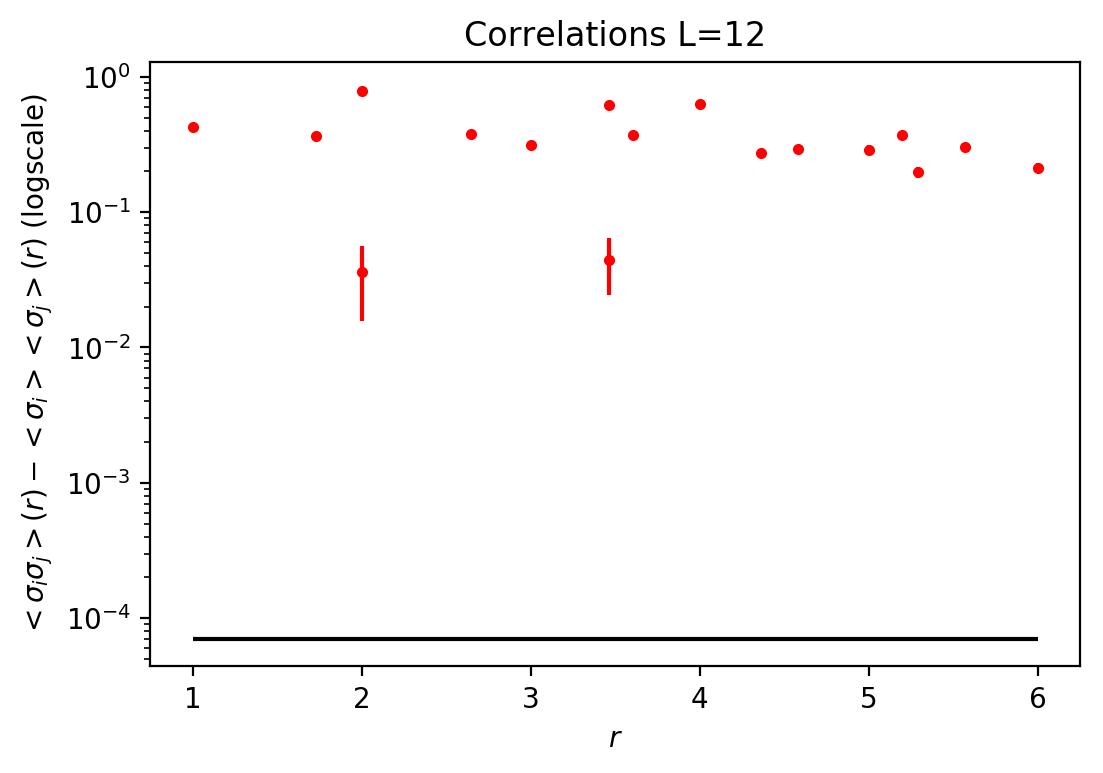

In [18]:
fig, ax = plt.subplots(dpi=200)
for i in range(n): 
    ax.set_yscale("log", nonposy='clip')
    plt.errorbar(rtot[i], corrtot[i], yerr=errcorrtot[i], fmt = '.', color = 'red')
    plt.hlines([maxerr[i]], minr[i],maxr[i])
    
print(corrtot[i])
print(errcorrtot[i])
plt.xlabel(r'$r$')
plt.ylabel(r'$<\sigma_i \sigma_j>(r) - <\sigma_i> <\sigma_j>(r) $ (logscale)')
plt.title('Correlations L={0}'.format(L[i]))
plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/Correlations_L={0}_various-nsms_semilogy.png'.format(L[i]))

In [19]:
### FITING
def algebraic(x, a, eta):
    return a / (x ** eta)
def expfunc(x, a, b):
    return a * np.exp(-b * x)

0
0 alg
0 exp


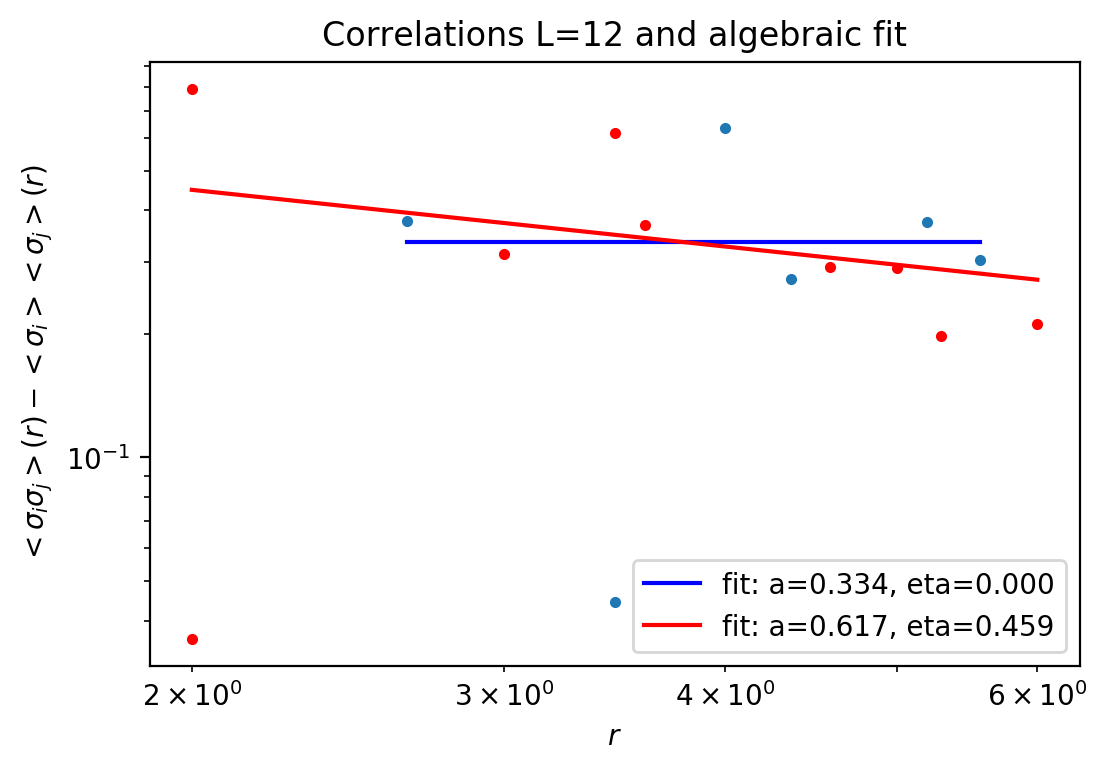

[0.02093936 0.01970302 0.01987515 0.01547132 0.02128739 0.0188807
 0.0195461 ]


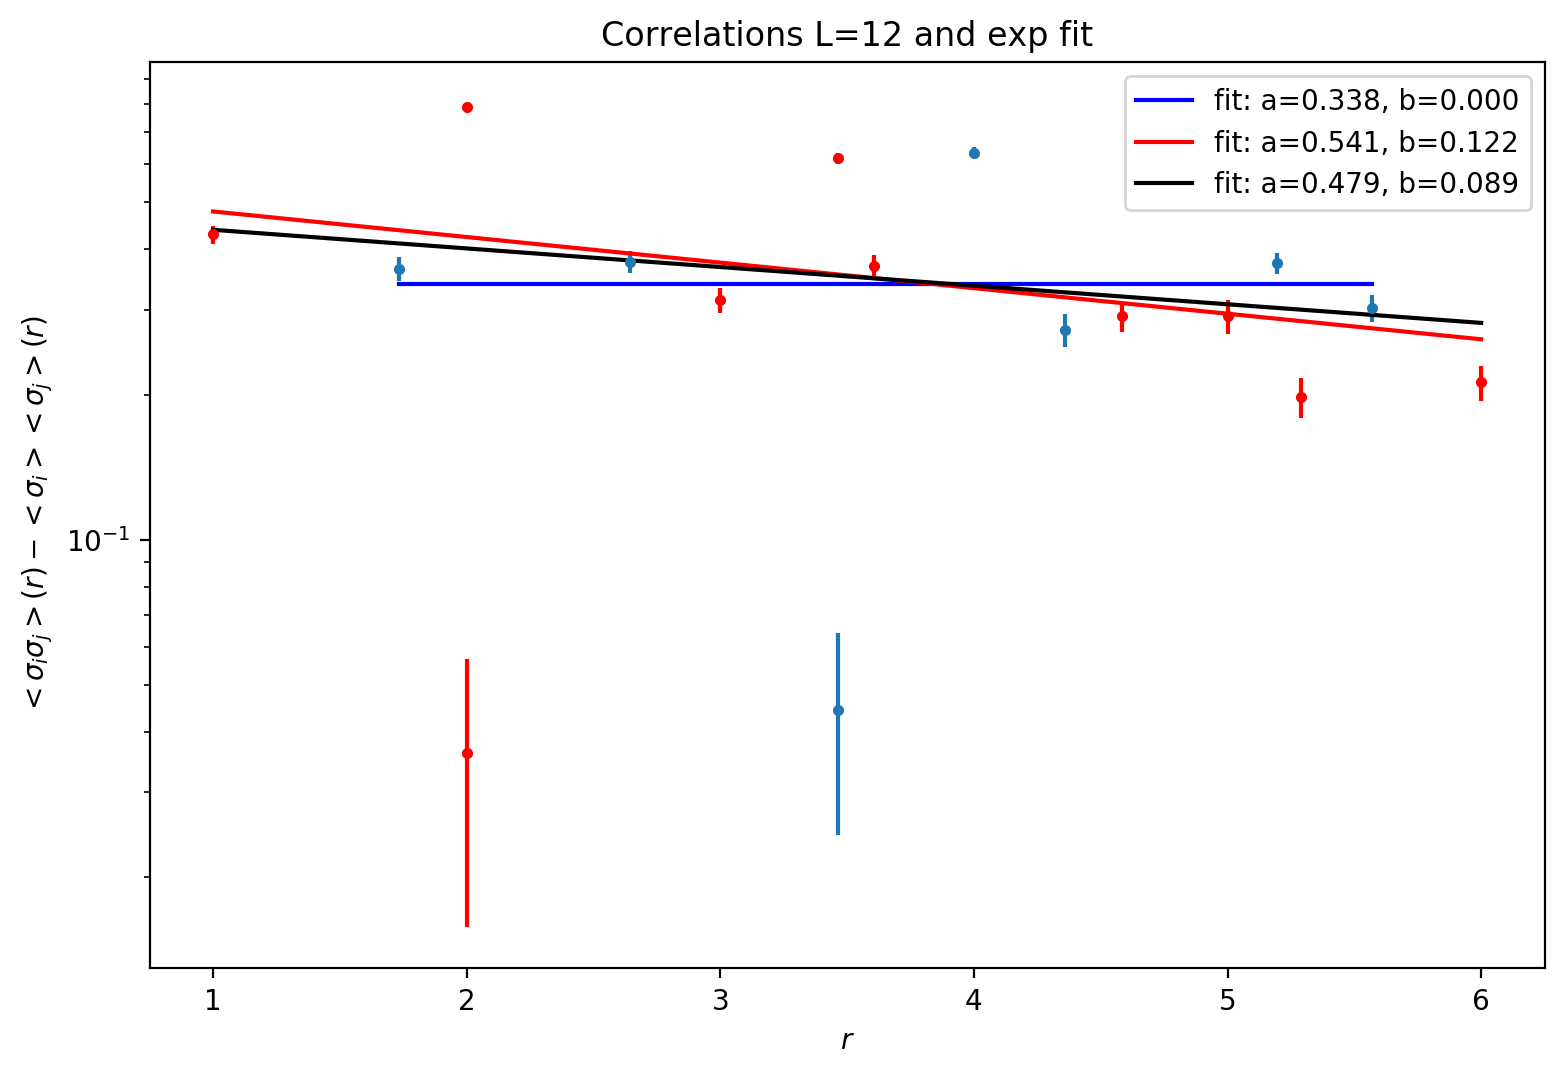

In [20]:
from scipy.optimize import curve_fit

poptalgpos = [[] for _ in range(n)]
pcovalgpos = [[] for _ in range(n)]

poptalgneg = [[] for _ in range(n)]
pcovalgneg = [[] for _ in range(n)]

poptexppos = [[] for _ in range(n)]
pcovexppos = [[] for _ in range(n)]

poptexpneg = [[] for _ in range(n)]
pcovexpneg = [[] for _ in range(n)]

poptexp = [[] for _ in range(n)]
pcovexp = [[] for _ in range(n)]

rposmax = 25
rnegmax = 25
rtotmax = 50
for i in range(0, n,1):
    print(i)
    
    poptalgpos[i], pcovalgpos[i] = curve_fit(algebraic, rpos[i][1:rposmax], corrpos[i][1:rposmax], bounds = (0, [2., 10]))
    poptalgneg[i], pcovalgneg[i] = curve_fit(algebraic, rneg[i][1:rnegmax], corrneg[i][1:rnegmax], bounds = (0, [2., 10]))
    
    print(i, 'alg')
    
    poptexppos[i], pcovexppos[i] = curve_fit(expfunc, rpos[i][0:rposmax], corrpos[i][0:rposmax], bounds = (0, [2., 4.]))
    poptexpneg[i], pcovexpneg[i] = curve_fit(expfunc, rneg[i][0:rnegmax], corrneg[i][0:rnegmax], bounds = (0, [2., 4.]))
    poptexp[i], pcovexp[i] = curve_fit(expfunc, rtot[i][0:rtotmax], corrtot[i][0:rtotmax], bounds=(0, [2., 4.]))
    print(i, 'exp')

    plt.figure(dpi=200)
    plt.loglog(rpos[i][1:rposmax], corrpos[i][1:rposmax], '.')
    plt.loglog(rpos[i][1:rposmax], algebraic(rpos[i][1:rposmax], *poptalgpos[i]), 'b-', label='fit: a=%5.3f, eta=%5.3f' % tuple(poptalgpos[i]))
    plt.loglog(rneg[i][1:rnegmax], corrneg[i][1:rnegmax], '.', color='red')
    plt.loglog(rneg[i][1:rnegmax], algebraic(rneg[i][1:rnegmax], *poptalgneg[i]), 'r-', label='fit: a=%5.3f, eta=%5.3f' % tuple(poptalgneg[i])) 
    plt.xlabel(r'$r$')
    plt.ylabel(r'$<\sigma_i \sigma_j>(r) - <\sigma_i> <\sigma_j>(r) $')
    plt.legend()
    plt.title('Correlations L={0} and algebraic fit'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/Correlations_AndAlgFit_L={0}_distmin=05_various-nsms.png'.format(L[i]))
    plt.show()
   
    print(errcorrpos[i])
    fig, ax = plt.subplots(dpi=200, figsize = (9,6))
    ax.set_yscale("log")#, nonposy='clip')
    plt.errorbar(rpos[i], corrpos[i], yerr=errcorrpos[i], fmt= '.')
    plt.errorbar(rneg[i], corrneg[i], yerr=errcorrneg[i], fmt ='.', color='red')
    plt.plot(rpos[i][0:rposmax], expfunc(rpos[i][0:rposmax], *poptexppos[i]), 'b-', label='fit: a=%5.3f, b=%5.3f' % tuple(poptexppos[i]))
    plt.plot(rneg[i][0:rnegmax], expfunc(rneg[i][0:rnegmax], *poptexpneg[i]), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(poptexpneg[i]))
    plt.plot(rtot[i][0:rtotmax], expfunc(rtot[i][0:rtotmax], *poptexp[i]), 'k-', label='fit: a=%5.3f, b=%5.3f' % tuple(poptexp[i]))
    plt.xlabel(r'$r$')
    plt.ylabel(r'$<\sigma_i \sigma_j>(r) - <\sigma_i> <\sigma_j>(r) $')
    plt.legend()
    plt.title('Correlations L={0} and exp fit'.format(L[i]))
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/Correlations_semilogy_AndexpFit_L={0}_distmin=05_various-nsms.png'.format(L[i]))
    #

[-0.4291868   0.36428544 -0.03618735 -0.7887636   0.37710663 -0.31325819
  0.04437023 -0.61725876]


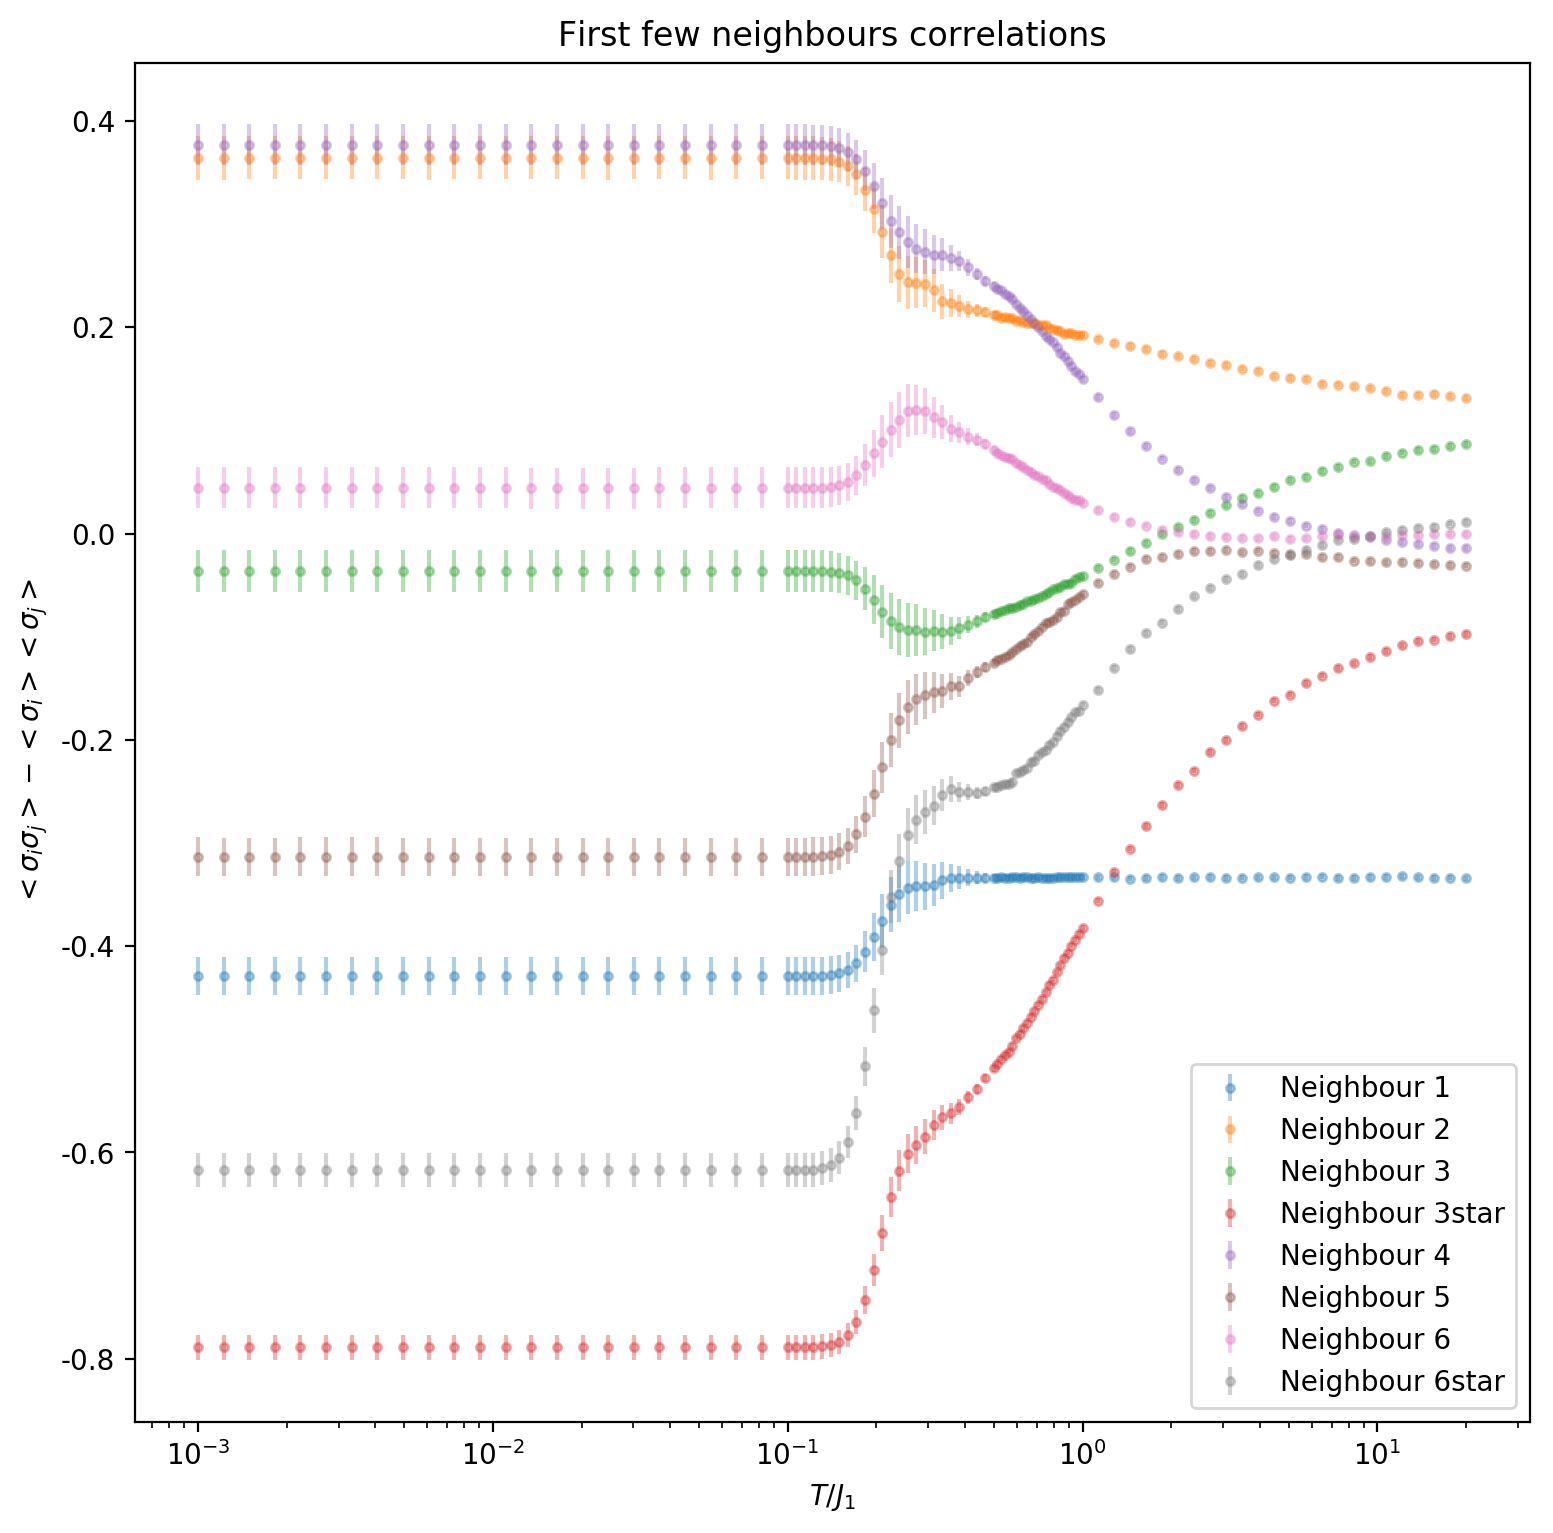

In [22]:

distmax = 3.5
nlistnames = ['1', '2', '3', '3star', '4', '5', '6', '6star']
for i in range(n):
    fig, ax = plt.subplots(dpi=200, figsize = (9,9))
    ax.set_xscale("log")
    plt.title('First few neighbours correlations')
     
    length = len(temperatures_plots[i])
    for t in range(length):
        
        corr = [np.array(t_MeanCorr[i])[:,t]]
        errcorr = [np.sqrt(np.array(t_errCorrEstim[i])[:,t])]
        (resr, rescorr, reserrcorr) = dist_corr(L[i], 0 ,corr, errcorr, distmax)
        if t == 0:
                print(rescorr)
        plt.gca().set_prop_cycle(None)
        for nei in range(0,len(rescorr)):
            if t == 0:
                plt.errorbar(temperatures_plots[i][t], rescorr[nei], reserrcorr[nei], fmt = '.',label = 'Neighbour {0}'.format(nlistnames[nei]), alpha = 0.35)
            else:
                plt.errorbar(temperatures_plots[i][t], rescorr[nei], reserrcorr[nei], fmt = '.', alpha = 0.35)

    #expcov = np.load('covariance.txt.npy')
    #experr = np.load('error.txt.npy')
    #plt.gca().set_prop_cycle(None)
    #for nei in range(0,len(rescorr)):
    #    plt.errorbar(2.3, expcov[nei], np.sqrt(experr[nei]), fmt = 'x', label = 'Neighbour {0}'.format(nlistnames[nei]))
    plt.xlabel(r'$T/J_1$')
    plt.ylabel(r'$<\sigma_i \sigma_j> - <\sigma_i> <\sigma_j> $')
    plt.legend(loc = 'best')
    plt.savefig('./' + foldername + 'Plots' + results_foldername+ '/FewCorrelations_L={0}_various-nsms_semilogT.png'.format(L[i]))
